<a href="https://colab.research.google.com/gist/soukainaRhazzafe/018c782da344991b02dbf5f9bb6de7fb/telecomusers-tru-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing modules and libraries

In [ ]:
import pandas as pd
import matplotlib as mp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
users= pd.read_csv("telecom_users.csv" , sep=",")
users.head(10)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
users = users.drop(columns=['Unnamed: 0','customerID'])

## First look at the dataset

###  'SenioCitizens' should have categorical values

In [ ]:
users['SeniorCitizen'] = users['SeniorCitizen'].replace({1:'Yes', 0:'No' })

## Dropping irrelevant columns

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   object 
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


## Converting 'TotelCharges' column to float

In [ ]:
users['TotalCharges'] = pd.to_numeric(users.TotalCharges, errors='coerce')

## Checking for duplicates

In [ ]:
users.duplicated().sum()

16

### There are16 duplicated rows.

### Dropping duplicates

In [ ]:
users = users.drop_duplicates()

# Describing numerical data

In [ ]:
users.describe()

,tenure,MonthlyCharges,TotalCharges
count,5970.000000,5970.000000,5960.000000
mean,32.553099,64.871926,2304.125772
std,24.494958,30.102688,2274.158543
min,0.000000,18.250000,18.800000
25%,9.000000,35.750000,412.012500
50%,29.000000,70.450000,1416.025000
75%,56.000000,89.937500,3852.775000
max,72.000000,118.750000,8684.800000


### There seems to be 10 missing values in the 'TotalCharges' column.


In [ ]:
users.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [ ]:
users.count()

gender              5970
SeniorCitizen       5970
Partner             5970
Dependents          5970
tenure              5970
PhoneService        5970
MultipleLines       5970
InternetService     5970
OnlineSecurity      5970
OnlineBackup        5970
DeviceProtection    5970
TechSupport         5970
StreamingTV         5970
StreamingMovies     5970
Contract            5970
PaperlessBilling    5970
PaymentMethod       5970
MonthlyCharges      5970
TotalCharges        5960
Churn               5970
dtype: int64

### There 10 missing values in the 'TotalCharges' column.


## Replacing missing values :

In [ ]:
users.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,No,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No
5,Female,No,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
6,Female,No,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.60,No


### Finding correlation between quantitative values :

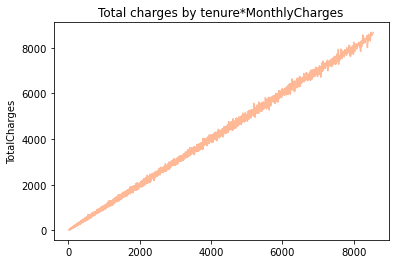

In [ ]:
sns.lineplot(x=users.tenure*users.MonthlyCharges,y=users.TotalCharges,color='#ffb997')
plt.title('Total charges by tenure*MonthlyCharges')
plt.show()

### 'TotalCharges' column is propotionnal to 'tenure'*'MonthlyCharges'

In [ ]:
users[users['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [ ]:
users.TotalCharges.fillna(users.MonthlyCharges*users.tenure, inplace=True)
#'TotalCharges' missing values could be filled with 0 since tenure==0 in all rows

In [ ]:
users.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
users[users['TotalCharges']==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0,No
634,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
2771,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
3086,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
3255,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
4326,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
5375,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
5382,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5695,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
5951,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No


## Missing values have been replaced with 0.

## Unique values of the columns

In [ ]:
column_names = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for col in column_names :
    print(col,users[col].unique())

gender ['Male' 'Female']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['Yes' 'No']
PhoneService ['Yes' 'No']
MultipleLines ['Yes' 'No' 'No phone service']
InternetService ['No' 'Fiber optic' 'DSL']
OnlineSecurity ['No internet service' 'No' 'Yes']
OnlineBackup ['No internet service' 'Yes' 'No']
DeviceProtection ['No internet service' 'Yes' 'No']
TechSupport ['No internet service' 'No' 'Yes']
StreamingTV ['No internet service' 'Yes' 'No']
StreamingMovies ['No internet service' 'No' 'Yes']
Contract ['Two year' 'Month-to-month' 'One year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']
Churn ['No' 'Yes']


# Disturbution analysis

## Churn count

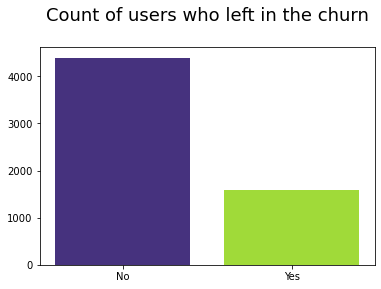

In [ ]:
plt.bar(users['Churn'].unique(), users['Churn'].value_counts(), color=[(0.275191, 0.194905, 0.496005),(0.626579, 0.854645, 0.223353)])
plt.title('Count of users who left in the churn\n', fontsize=18)
plt.show()

## Disturbution of numerical data

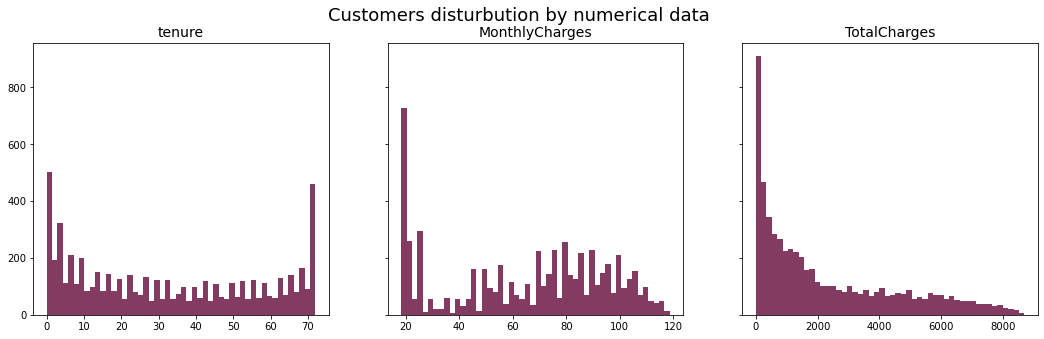

In [ ]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1,3,figsize=(18,5), sharey=True)
axes = axes.ravel()
#ravel() returns a 1-D array containing the elements of the input


for ax, x in zip(axes, numerical_columns):#zip() takes in iterables as arguments and returns an iterator.
    ax.hist(users[x],  bins=50, color=['#843b62'])
    ax.set_title(x, fontsize=14)


fig.suptitle('Customers disturbution by numerical data', fontsize=18)
plt.show()

In [ ]:
users.skew()

tenure            0.230418
MonthlyCharges   -0.221472
TotalCharges      0.948410
dtype: float64

### 'tenure' and  'MonthlyCharges' ' plots are fairly symmetrical while TotalCharges' 's plot is moderately right skewed

In [ ]:
users.TotalCharges = np.sqrt(users['TotalCharges'])


In [ ]:
users['TotalCharges'].head(15)

0     41.649130
1     63.033325
2     53.570981
3     15.443445
4     10.931606
5     58.053424
6     54.677235
7      4.989990
8     36.182178
9     79.890863
10    59.015676
11    39.515820
12    77.575125
13    51.128270
14    60.066630
Name: TotalCharges, dtype: float64

In [ ]:
users.skew()

tenure            0.230418
MonthlyCharges   -0.221472
TotalCharges      0.299830
dtype: float64

<AxesSubplot:ylabel='TotalCharges'>

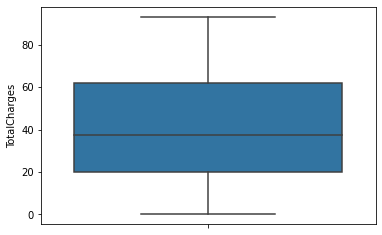

In [ ]:
sns.boxplot(y=users['TotalCharges'])


In [ ]:
s=sns.color_palette('viridis')
s[4]

(0.288921, 0.758394, 0.428426)

## Demographic churn dirturbution

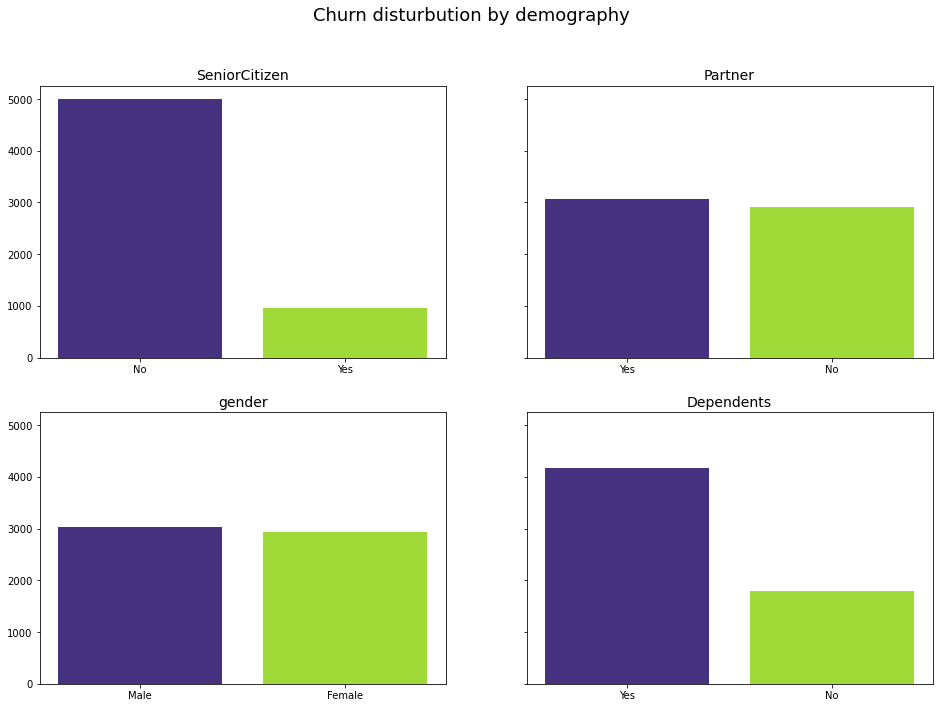

In [ ]:
demograph_columns = ['SeniorCitizen', 'Partner', 'gender', 'Dependents']
fig, axes = plt.subplots(2,2,figsize=(16, 11), sharey=True)
axes = axes.ravel()
#ravel() returns a 1-D array containing the elements of the input


for ax, x in zip(axes, demograph_columns):#zip() takes in iterables as arguments and returns an iterator.
     ax.bar(users[x].unique(),users[x].value_counts(),color=[(0.275191, 0.194905, 0.496005),(0.626579, 0.854645, 0.223353)])
     ax.set_title(x, fontsize=14)

fig.suptitle('Churn disturbution by demography', fontsize=18)
plt.show()

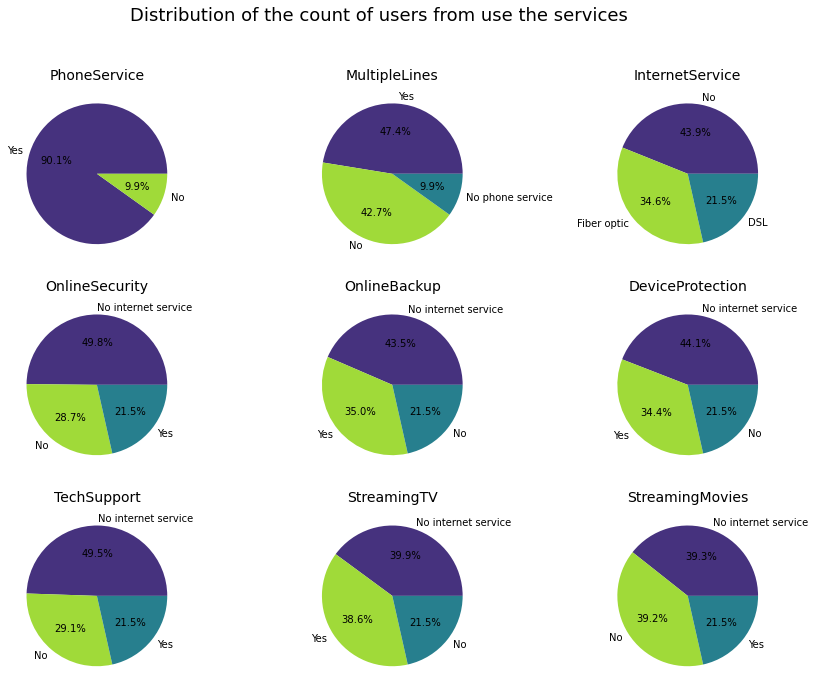

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(15, 11))
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
axes = axes.ravel()

for ax, x in zip(axes.ravel(), services_columns):
    ax.pie(users[x].value_counts(), labels=users[x].unique(),autopct='%1.1f%%',
          colors=[(0.275191, 0.194905, 0.496005) ,(0.626579, 0.854645, 0.223353),(0.153364, 0.497, 0.557724)])
    ax.set_title(x, fontsize=14)

fig.suptitle('Distribution of the count of users from use the services', fontsize=18)
plt.show()

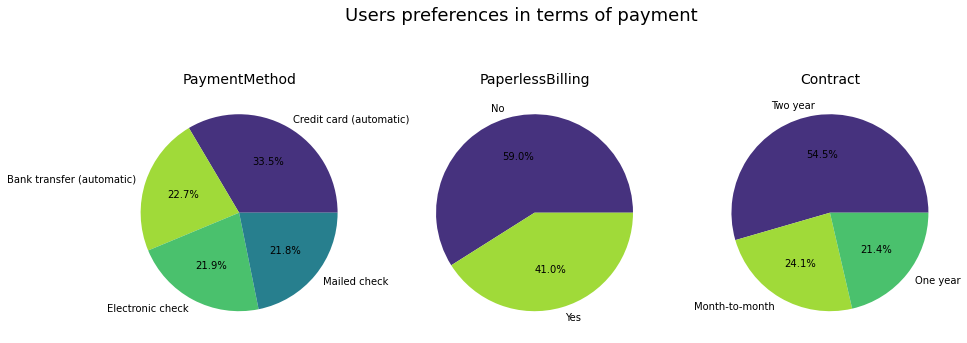

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15, 6))
payment_columns = ['PaymentMethod', 'PaperlessBilling', 'Contract']
axes = axes.ravel()

for ax, x in zip(axes.ravel(), payment_columns):
    ax.pie(users[x].value_counts(), labels=users[x].unique(),autopct='%1.1f%%',
          colors=[(0.275191, 0.194905, 0.496005) ,(0.626579, 0.854645, 0.223353),(0.288921, 0.758394, 0.428426),(0.153364, 0.497, 0.557724)])
    ax.set_title(x, fontsize=14)\

fig.suptitle('Users preferences in terms of payment', fontsize=18)
plt.show()

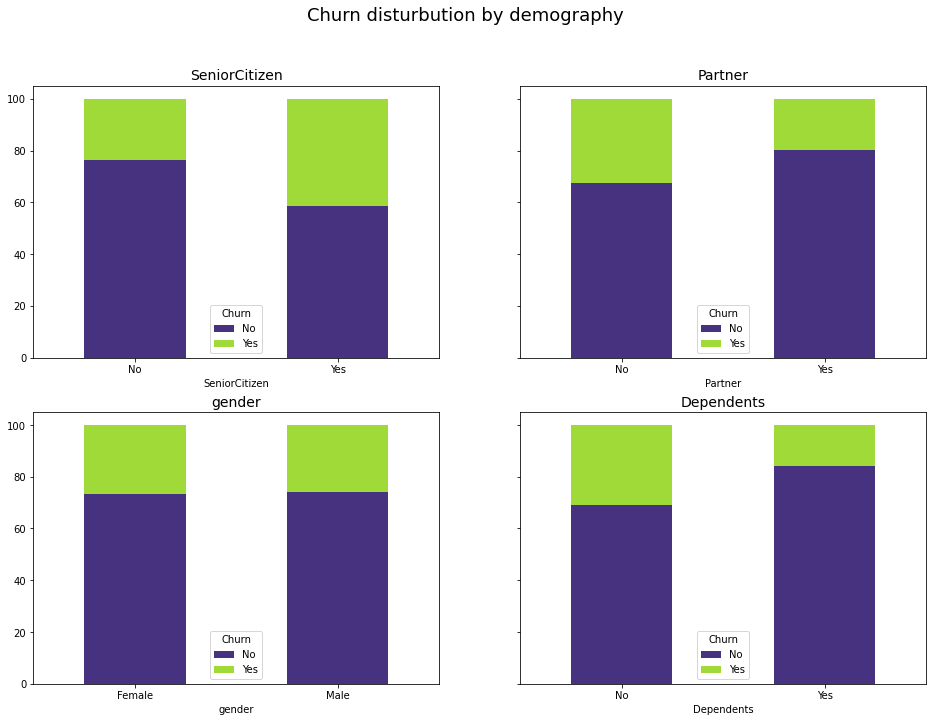

In [ ]:
demograph_columns = ['SeniorCitizen', 'Partner', 'gender', 'Dependents']
fig, axes = plt.subplots(2,2,figsize=(16, 11), sharey=True)
axes = axes.ravel()
#ravel() returns a 1-D array containing the elements of the input


for ax, x in zip(axes, demograph_columns):#zip() takes in iterables as arguments and returns an iterator.
    churn_users = users.groupby([x,'Churn']).size().unstack()
    axi = (churn_users.T*100.0 / churn_users.T.sum()).T.plot(kind='bar',ax=ax,stacked = True, rot = 0,color=[(0.275191, 0.194905, 0.496005) ,(0.626579, 0.854645, 0.223353)])
    ax.set_title(x, fontsize=14)

fig.suptitle('Churn disturbution by demography', fontsize=18)
plt.show()

### Senior citizens, customers with no dependents and no partner churn out the most.
### Customers of both genders have the same churn rate.

## Sevices Disturbution

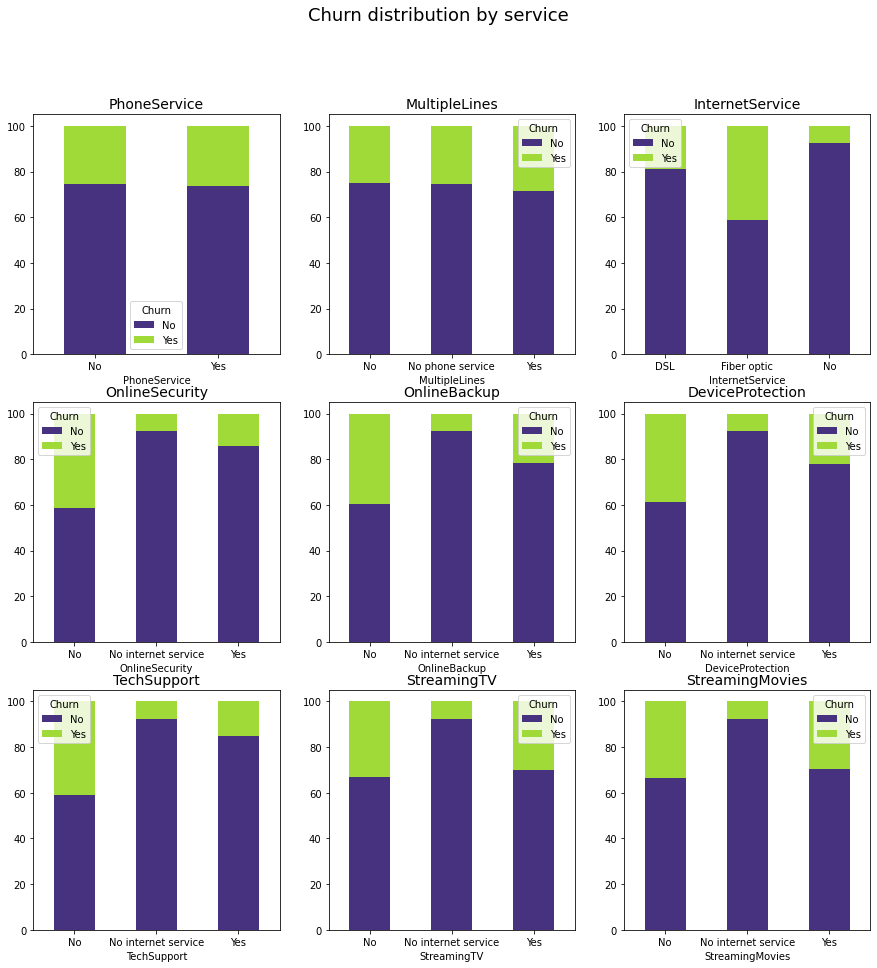

In [ ]:

fig, axes = plt.subplots(3,3,figsize=(15, 15))

axes = axes.ravel()

for ax,x in zip(axes,services_columns):
    churn_users = users.groupby([x,'Churn']).size().unstack()
    axi = (churn_users.T*100.0 / churn_users.T.sum()).T.plot(kind='bar',ax=ax,stacked = True, rot = 0,color=[(0.275191, 0.194905, 0.496005) ,(0.626579, 0.854645, 0.223353)])
    ax.set_title(x, fontsize=14)


fig.suptitle('Churn distribution by service', fontsize=18)
plt.show()

### Customers with fiber optic option churn out the most.
### Customers with no internet service chun out the least.
### Customers with or without phone service have the same churn rate.
### Customers with no services are more likely to churn.

## payment methods analysis

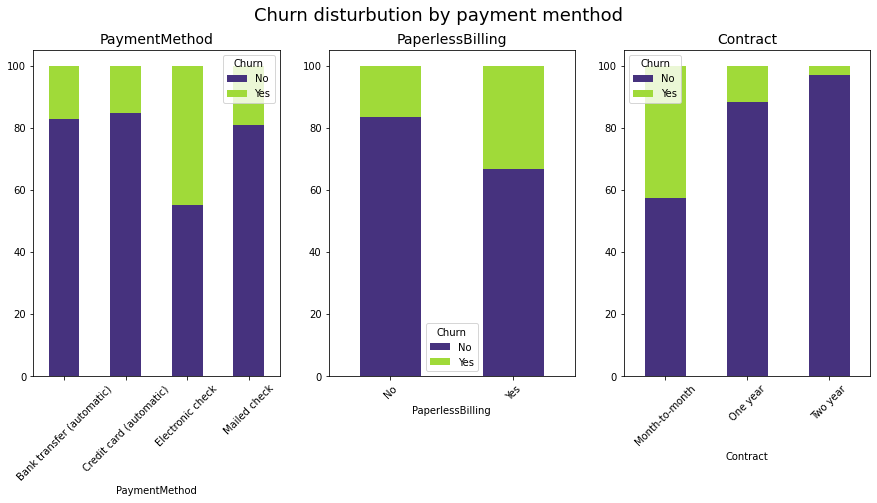

In [ ]:

fig, axes = plt.subplots(1,3,figsize=(15, 6))

axes = axes.ravel()

for ax, x in zip(axes, payment_columns):

    churn_users = users.groupby([x,'Churn']).size().unstack()
    axi = (churn_users.T*100.0 / churn_users.T.sum()).T.plot(kind='bar',ax=ax,stacked = True, rot = 0,color=[(0.275191, 0.194905, 0.496005) ,(0.626579, 0.854645, 0.223353)])
    ax.set_title(x, fontsize=14)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
fig.suptitle('Churn disturbution by payment menthod', fontsize=18)

plt.show()

### Customers with month to moth contract, paperpless billing and electronic check payment method churn out more.

## Variables correlation to Churn

In [ ]:
users['Churn'] = users['Churn'].replace({'Yes': 1, 'No': 0})

In [ ]:
users_dummies = pd.get_dummies(users)
users_dummies.columns


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One yea

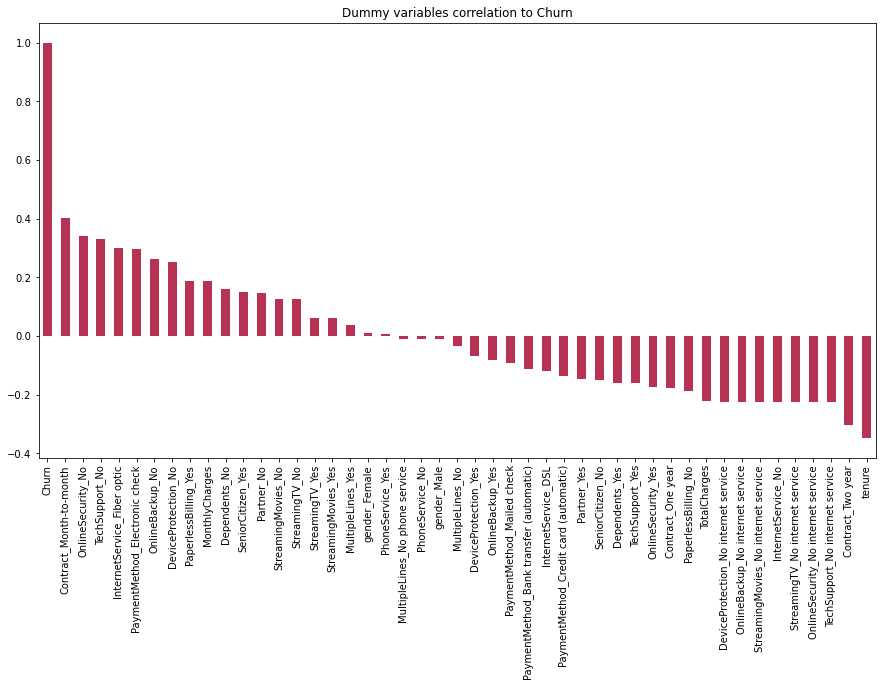

In [ ]:
plt.figure(figsize=(15,8))
users_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color=['#b83253'])
plt.title('Dummy variables correlation to Churn')
plt.show()

In [ ]:
users_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.403372
OnlineSecurity_No                          0.341287
TechSupport_No                             0.330522
InternetService_Fiber optic                0.301155
PaymentMethod_Electronic check             0.296528
OnlineBackup_No                            0.264174
DeviceProtection_No                        0.251354
PaperlessBilling_Yes                       0.188595
MonthlyCharges                             0.188022
Dependents_No                              0.159265
SeniorCitizen_Yes                          0.150777
Partner_No                                 0.145265
StreamingMovies_No                         0.127936
StreamingTV_No                             0.126298
StreamingTV_Yes                            0.062317
StreamingMovies_Yes                        0.060819
MultipleLines_Yes                          0.038357
gender_Female                              0.009901
PhoneService

Month to month contracts, absence of online security and tech support seem to be the most correlated with churn.

Tenure, two year contracts seem to be the least correlated with churn.

Online security, streaming TV, online backup, tech support services... without internet connection also seem to be not related to churn; no internet service in general is not correlated to costumers' churn.

## Splitting the dataset into input/data and output/target values

In [ ]:

y = users.Churn.values

### Splitting data to train, test and validation sets

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=103,  shuffle=True, stratify=y)
a=x_test
b=y_test

x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1045,Female,No,Yes,Yes,2,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,30.25,7.984360
333,Male,No,No,No,65,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,40.678618
4836,Female,No,No,No,6,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,63.40,18.676188
4992,Male,Yes,Yes,No,34,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),71.55,49.268144
1352,Male,No,No,No,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.30,4.393177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Female,Yes,No,No,28,Yes,DSL,No,Yes,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),64.45,43.215738
2607,Male,No,No,No,31,Yes,Fiber optic,No,No,No,Yes,No,No,One year,No,Credit card (automatic),81.70,50.484156
2712,Male,No,Yes,No,16,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),80.75,36.349691
4500,Male,No,No,No,20,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,51.80,31.997656


## Data encoding after splitting to avoid data leakage

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce
c= ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaymentMethod']
encoder=ce.OneHotEncoder(cols=c,handle_unknown='ignore',return_df=True,use_cat_names=True)

In [ ]:
for col in c :
    train_data_encoded = encoder.fit_transform(x_train)
    test_data_encoded = encoder.transform(x_test)

In [ ]:
x_train=train_data_encoded
x_test=test_data_encoded

In [ ]:
cols=['SeniorCitizen', 'Partner', 'Dependents','PaperlessBilling']

In [ ]:
for col in cols :
    x_train[col] = x_train[col].replace({'Yes': 1, 'No': 0})
    x_test[col] = x_test[col].replace({'Yes': 1, 'No': 0})

In [ ]:
x_train['gender'] =x_train['gender'].replace({'Female': 1, 'Male': 0})
#x_train=x_train.drop('MultipleLines_No phone service',axis=1)
x_test['gender'] =x_test['gender'].replace({'Female': 1, 'Male': 0})
#x_test=x_test.drop('MultipleLines_No phone service',axis=1)

## Data Scalling

from sklearn.preprocessing import StandardScaler
b1=x_test.iloc[10]
col_names = ['tenure', 'MonthlyCharges','TotalCharges']
sc = StandardScaler()
for col in col_names :
    x_train[col] = sc.fit_transform(x_train[col].values.reshape(-1,1))
    #values.reshape(-1,1) is used to Convert the 1-D array into a 2-D array
    x_test[col] = sc.transform(x_test[col].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = x_train.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train))
x_train.columns = features
x_test=pd.DataFrame(scaler.transform(x_test))
x_test.columns = features

## Models Evaluation

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

##  Learning curve to evaluate the models

In [ ]:
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score,validation_curve,learning_curve

In [ ]:
model_names = ['Random Forest Classifier','Gaussian NaiveB classifier','MLP Classifier']
models=[RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30),GaussianNB(),MLPClassifier(activation= 'tanh', alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate= 'adaptive', solver= 'sgd')]

In [ ]:
a

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1388,Female,No,No,No,12,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.90,33.480591
1281,Male,Yes,Yes,No,11,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,28.891175
2382,Female,No,No,No,30,Yes,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),106.40,56.673627
2076,Male,No,No,No,2,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,79.85,12.347064
1195,Female,No,No,No,25,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,54.20,37.724660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,Female,No,Yes,Yes,72,Yes,Fiber optic,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),90.35,81.014813
4928,Female,No,Yes,No,2,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.05,11.577996
4603,Female,Yes,Yes,No,20,No,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),91.00,43.121920
5475,Female,Yes,No,No,14,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,33.194126


In [ ]:
arr=[0,1,2]

C:\Users\PC\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


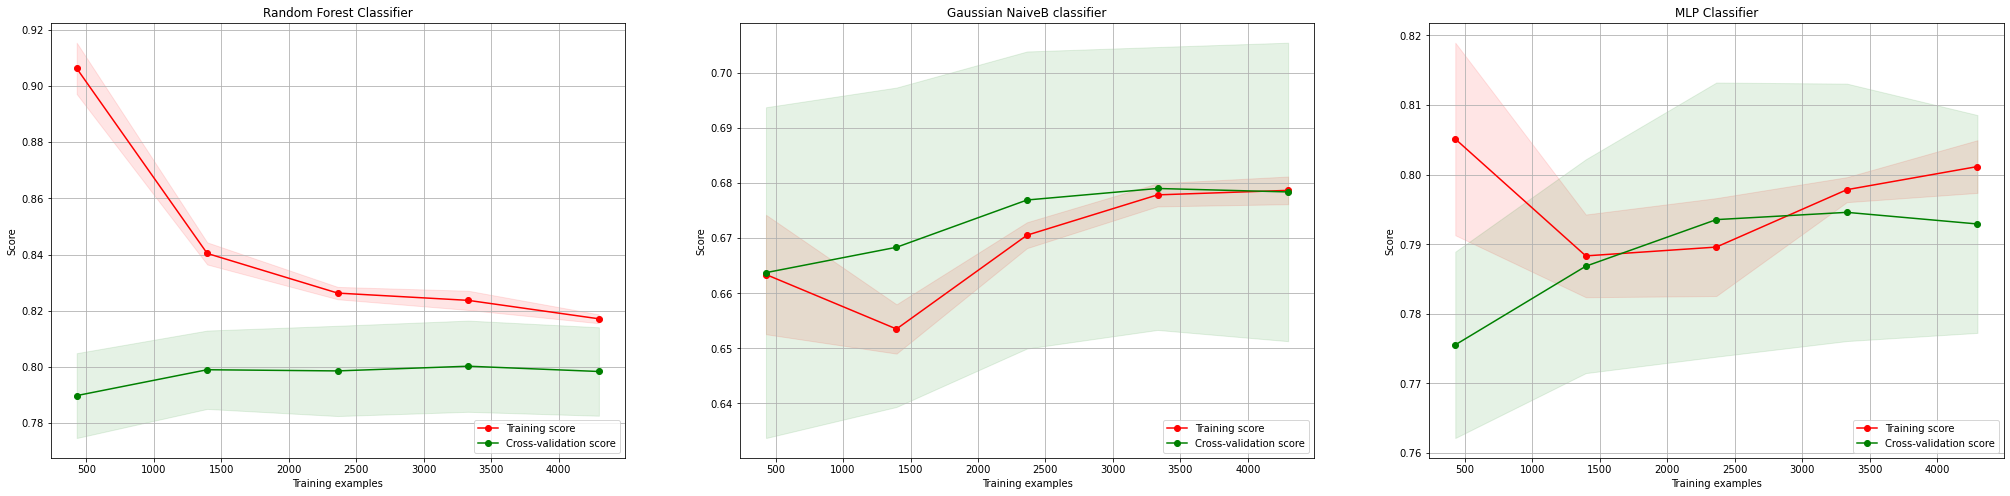

required Time : 34.26462721824646


In [ ]:
fig, axes = plt.subplots(1,3,figsize=(35, 8))

axes = axes.ravel()
start=time.time()
for ax,model,i in zip(axes,models,arr) :
    size = 10
    model.fit(x_train,y_train)
    cv = StratifiedKFold(size, shuffle=True)
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #ax.subplots( figsize=(8,8))
    ax.set_title(model_names[i])

    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    # plot the std deviation as a transparent range at each training set size
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    # plot the average training and test score lines at each training set size
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.legend(loc="lower right")
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    ax.grid()

plt.show()
end=time.time()
print('required Time :',(end-start))

### The rabdom Forest classifier's learning curve converges, which means it is a good fit, it is the most accurate model, it also  indicates thet the addition of more training examples doesn’t improve the model performance on unseen data.


In [ ]:
model_rft=models[2]
model_rft.fit(x_train,y_train)
y_pred = model_rft.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy : ',acc)
print(classification_report(y_test,y_pred))

Accuracy :  0.8065326633165829
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       879
           1       0.67      0.53      0.59       315

    accuracy                           0.81      1194
   macro avg       0.76      0.72      0.73      1194
weighted avg       0.80      0.81      0.80      1194



C:\Users\PC\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model_rft=RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30)
model_rft.fit(x_train,y_train)
y_pred = model_rft.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('Accuracy : ',acc)
print(classification_report(y_test,y_pred))

Accuracy :  0.804857621440536
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       879
           1       0.69      0.48      0.56       315

    accuracy                           0.80      1194
   macro avg       0.76      0.70      0.72      1194
weighted avg       0.79      0.80      0.79      1194



### 10-fold cross Validation

In [ ]:
size=10
skFold=StratifiedKFold(size, shuffle=True)

In [ ]:
all_accuracies = cross_val_score(RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30),x_train,y_train, scoring='accuracy', cv=skFold, n_jobs=-1)

cross validation scores mean :  0.7975246265449156
deviation :  0.016213089596817734


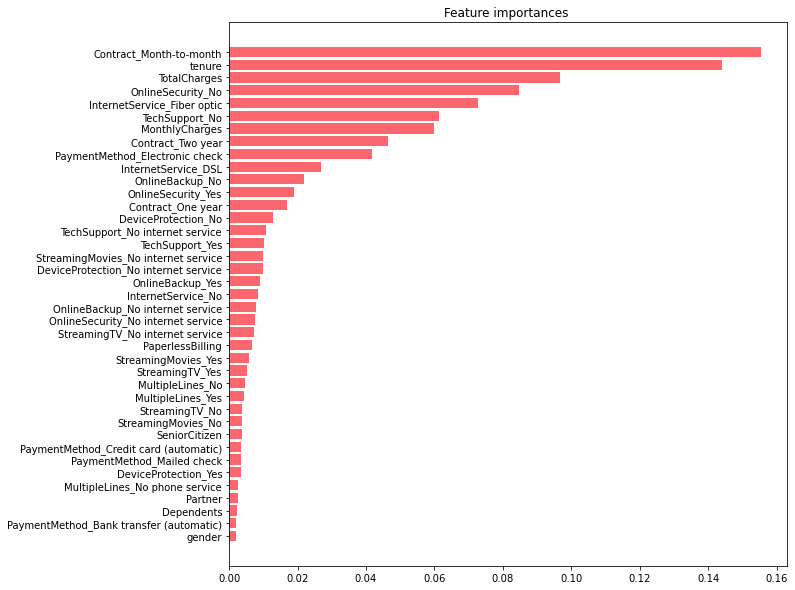

In [ ]:
plt.figure(figsize=(10,10))
sorted_columns = model_rft.feature_importances_.argsort()
plt_rf =plt.barh(x_train.columns[sorted_columns], model_rft.feature_importances_[sorted_columns],color='#fc666f')
plt.title('Feature importances ')
print('cross validation scores mean : ',all_accuracies.mean())
print('deviation : ',all_accuracies.std())

In [ ]:
print('deviation : ',all_accuracies.std())

deviation :  0.016213089596817734


### the deviation is extremely low, which means that our model has a very low variance;  the model will perform more or less similar on all test sets.

## Hyperparametrs tuning

### MLP Classifier

In [ ]:
mlp_gs = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_test, y_test)

C:\Users\PC\Documents\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
y_true, y_pred = y_test , clf.predict(x_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(accuracy_score(y_true, y_pred))

Results on the test set:
0.838358458961474


### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_rft= RandomForestClassifier()
distributions = dict(max_features=np.arange(1, 18, 1), n_estimators=np.arange(10, 1000, 10), min_samples_leaf=np.arange(1, 9, 1),
                    criterion=['gini', 'entropy'], class_weight=['balanced', 'balanced_subsample'])
rcv = RandomizedSearchCV(model_rft, distributions, random_state=17)
search3 = rcv.fit(x_train, y_train)
search3.best_params_

{'n_estimators': 130,
 'min_samples_leaf': 2,
 'max_features': 11,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample'}

## Model deployement

In [ ]:
import pickle

In [ ]:
pickle.dump(models[0], open('randomforest.pkl','wb'))
pickle.dump(models[1], open('gaussiannbclass.pkl','wb'))
pickle.dump(models[2], open('mlpclassifier.pkl','wb'))

In [ ]:
model = pickle.load(open('random.pkl','rb'))

C:\Users\PC\Documents\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\PC\Documents\Anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
model

RandomForestClassifier(max_leaf_nodes=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=50)

In [ ]:
m=MLPClassifier(max_iter=1000,activation='tanh',alpha= 0.1, hidden_layer_sizes= (20,), learning_rate= 'adaptive', solver='sgd')

## Pickling the training and testing sets

In [ ]:
import pickle
filename = 'xtestSet.csv'
pickle.dump(x_test, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'ytestSet.csv'
pickle.dump(y_test, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'xtrainSet.csv'
pickle.dump(x_train, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'ytrainSet.csv'
pickle.dump(y_train, open(filename, 'wb'))

In [ ]:
y=pd.read_pickle('xtrainSet.csv')
y

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines_No,MultipleLines_Yes,MultipleLines_No phone service,InternetService_DSL,InternetService_Fiber optic,...,Contract_Month-to-month,Contract_Two year,Contract_One year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),MonthlyCharges,TotalCharges
5293,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,45.30,6.730527
5077,1,1,1,0,32,0,1,0,0,1,...,1,0,0,0,0,1,0,0,79.30,50.695167
3625,1,0,0,0,25,0,1,0,0,1,...,0,1,0,0,1,0,0,0,108.90,53.000472
4930,0,0,0,0,1,1,0,0,0,1,...,1,0,0,1,1,0,0,0,88.35,9.399468
4384,1,0,1,1,34,1,0,0,0,0,...,1,0,0,0,0,1,0,0,20.65,26.765650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,1,1,0,0,16,1,0,0,0,1,...,1,0,0,1,1,0,0,0,94.45,38.874156
2074,0,0,0,0,60,0,1,0,0,1,...,0,1,0,1,1,0,0,0,89.55,72.327035
1500,0,0,0,0,72,0,0,1,1,0,...,0,1,0,1,0,0,1,0,61.20,66.258962
5138,1,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,19.55,4.421538


In [ ]:
y=pd.DataFrame(data=y,columns=['Churn'])

In [ ]:
pickle.dump(scaler, open('scaler1.pkl','wb'))

In [ ]:
scl = pickle.load(open('scaler1.pkl','rb'))

In [ ]:
scl

MinMaxScaler()

In [ ]:
b1 =scl.transform(b1.values.reshape(1, -1))

In [ ]:
b1=np.around(b1,decimals=6)